In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np


df = pd.read_csv('cwdata_cleaned.csv')

# Drop the 'Stolen' column as it represents the target variable
df.drop(columns=['Stolen'], inplace=True)

df.head()

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour
0,76300,RURAL,1,1,BMW,3 SERIES,1,25,BLACK
1,52340,RURAL,0,1,MERCEDES,C CLASS,0,25,GREY
2,150600,RURAL,1,1,BMW,3 SERIES,0,19,WHITE
3,50000,RURAL,1,1,VOLKSWAGON,GOLF,1,55,BLACK
4,15000,RURAL,1,1,PEUGEOT,107,0,54,YELLOW


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Colour'] = label_encoder.fit_transform(df['Colour'])

In [3]:
# Scale numerical variables
scaler = StandardScaler()
#numerical_cols = ['Income', 'Age']  # List numerical column names
#df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [4]:
# Perform hierarchical clustering
X_scaled = StandardScaler().fit_transform(df)
linkage_matrix = linkage(X_scaled, method='ward')  # Using Ward's method for linkage


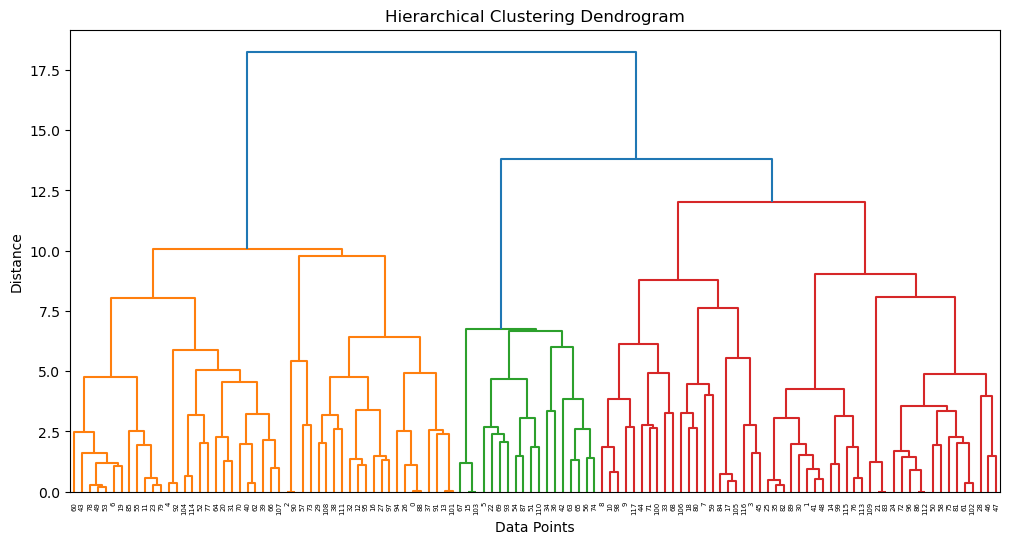

In [5]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


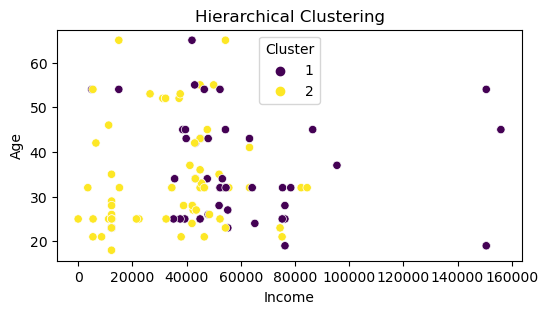

In [6]:
# Determine the number of clusters
num_clusters = 2  # Specify the desired number of clusters

# Extract cluster assignments
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster assignments to the DataFrame
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Income', y='Age', hue='Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.13278395109703164


In [8]:
# Summary statistics for each cluster
cluster_stats = df.groupby('Cluster').describe()
print(cluster_stats)


        Income                                                                 \
         count          mean           std     min      25%      50%      75%   
Cluster                                                                         
1         49.0  58877.142857  33391.084249  5000.0  43000.0  52340.0  65200.0   
2         69.0  34964.840580  20078.451011     0.0  12345.0  41230.0  45500.0   

                   Area            ...   Age       Colour                      \
              max count      mean  ...   75%   max  count      mean       std   
Cluster                            ...                                          
1        156000.0  49.0  0.000000  ...  43.0  65.0   49.0  3.224490  3.203288   
2         84500.0  69.0  0.463768  ...  37.0  65.0   69.0  4.101449  2.728633   

                                  
         min  25%  50%  75%  max  
Cluster                           
1        0.0  0.0  3.0  7.0  8.0  
2        0.0  1.0  5.0  7.0  8.0  

[2 rows x 72

In [9]:
# Median values for each cluster
cluster_medians = df.groupby('Cluster').median()
print(cluster_medians)


          Income  Area  Employed  Home Owner  Make  Model  Gender   Age  \
Cluster                                                                   
1        52340.0   0.0       1.0         1.0   1.0    4.0     0.0  32.0   
2        41230.0   0.0       0.0         1.0   5.0   14.0     1.0  32.0   

         Colour  
Cluster          
1           3.0  
2           5.0  


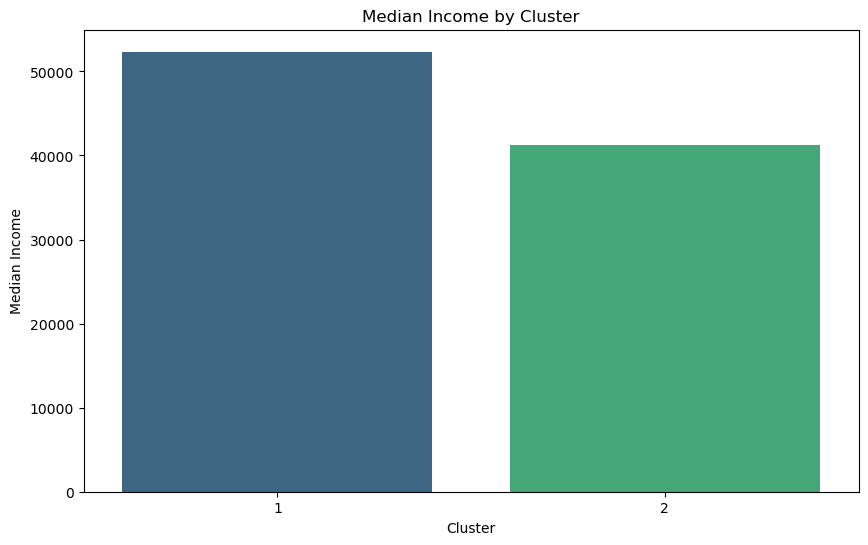

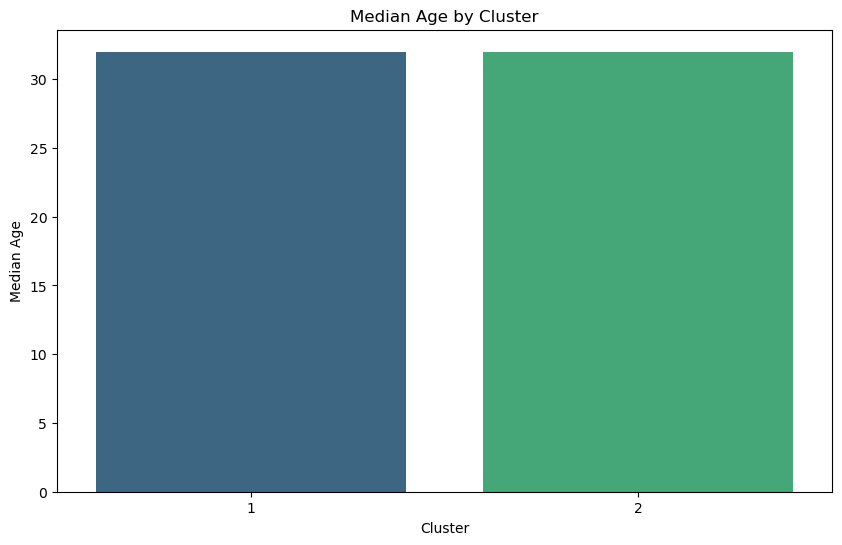

In [10]:
# Visualize cluster profiles
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_medians.reset_index(), x='Cluster', y='Income', palette='viridis')
plt.title('Median Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_medians.reset_index(), x='Cluster', y='Age', palette='viridis')
plt.title('Median Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Age')
plt.show()


A low silhouette score in hierarchical clustering (HC) compared to other clustering algorithms could be due to several factors, including:

* Sensitivity to noise and outliers: HC is sensitive to noise and outliers because it uses the distance between points to form clusters. Outliers or noisy data points can affect the clustering results and lead to lower silhouette scores.

* Difficulty in identifying the optimal number of clusters: Unlike algorithms like K-means, which require specifying the number of clusters beforehand, HC doesn't have an explicit mechanism for determining the optimal number of clusters. Choosing the appropriate number of clusters can be challenging and may result in suboptimal clustering solutions, leading to lower silhouette scores.
